# PREDICTIVE MODELING WITH LINEAR REGRESSION

Problem Statement : Implement a simple linear regression model using a dataset with continuous
target variables. Split the data into training and testing sets, train the model on
the training data, evaluate its performance using metrics like mean squared
error or R-squared, and make predictions on the test set. Visualize the
regression line and actual vs. predicted values to assess the model's accuracy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("carprices.csv")
df

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


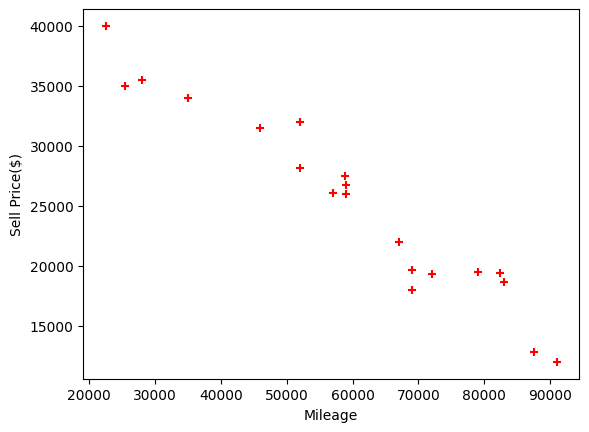

In [3]:
plt.xlabel("Mileage")
plt.ylabel("Sell Price($)")
plt.scatter(df['Mileage'],df['Sell Price($)'],color='red',marker='+')

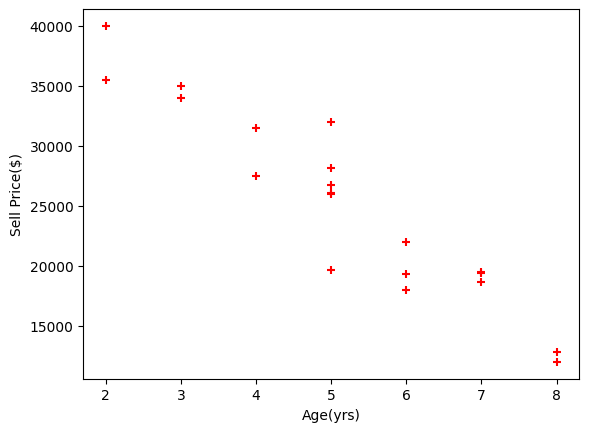

In [5]:
plt.xlabel("Age(yrs)")
plt.ylabel("Sell Price($)")
plt.scatter(df['Age(yrs)'],df['Sell Price($)'],color='red',marker='+')

In [6]:
x= df[['Mileage','Age(yrs)']]
x

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4
5,59000,5
6,52000,5
7,72000,6
8,91000,8
9,67000,6


In [7]:
y=df[['Sell Price($)']]
y

,Sell Price($)
0,18000
1,34000
2,26100
3,40000
4,31500
5,26750
6,32000
7,19300
8,12000
9,22000


# Spliting  the data into training and testing sets, train the model on the training data

In [8]:
from sklearn.model_selection import train_test_split 

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) # test_size=0.2 --> ration to divide train and test data

In [10]:
len(x_train)

16

In [11]:
len(x_test)

4

In [12]:
from sklearn.linear_model import LinearRegression 
clf = LinearRegression()

In [13]:
clf.fit(x_train,y_train)

LinearRegression()

In [14]:
clf.predict(x_test)

array([[27450.3138446 ],
       [21982.17188485],
       [37849.72159511],
       [14397.52599069]])

In [15]:
clf.predict([[52000,5]])

C:\Users\Rohan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[27450.3138446]])

In [16]:
clf.score(x_test,y_test)*100

90.4421252285835

# Evaluating  its performance using metrics like mean squared error 

In [17]:
from sklearn.metrics import mean_squared_error

y_pred = clf.predict(x_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
mse

11732291.281913742

In [18]:
y_test

,Sell Price($)
6,32000
0,18000
3,40000
8,12000


In [19]:
y_pred = clf.predict(x_test)

Text(0.5, 0.92, '3D Regression Plane')

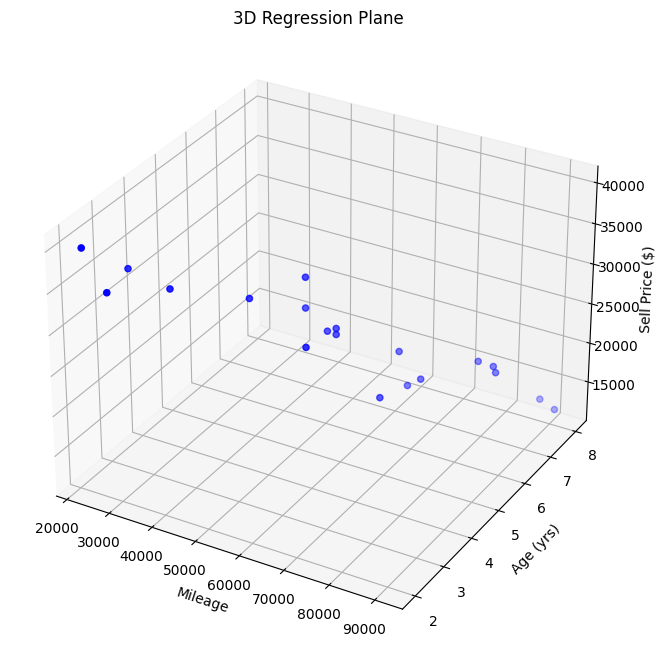

In [22]:

fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(121, projection='3d')

# Scatter plot of actual data
ax.scatter(df['Mileage'], df['Age(yrs)'], df['Sell Price($)'], color='blue', label='Actual data')

# Create a grid for the regression plane
# mileage_range = np.linspace(df['Mileage'].min(), df['Mileage'].max(), 100)
# age_range = np.linspace(df['Age(yrs)'].min(), df['Age(yrs)'].max(), 100)
# mileage_grid, age_grid = np.meshgrid(mileage_range, age_range)
# price_grid = model.predict(np.c_[mileage_grid.ravel(), age_grid.ravel()]).reshape(mileage_grid.shape)

# Plot the regression plane
# ax.plot_surface(mileage_grid, age_grid, price_grid, color='red', alpha=0.3, rstride=100, cstride=100, label='Regression Plane')

# Labels and title
ax.set_xlabel('Mileage')
ax.set_ylabel('Age (yrs)')
ax.set_zlabel('Sell Price ($)')
ax.set_title('3D Regression Plane')

# Visualize the regression line and actual vs. predicted values to assess the model's accuracy

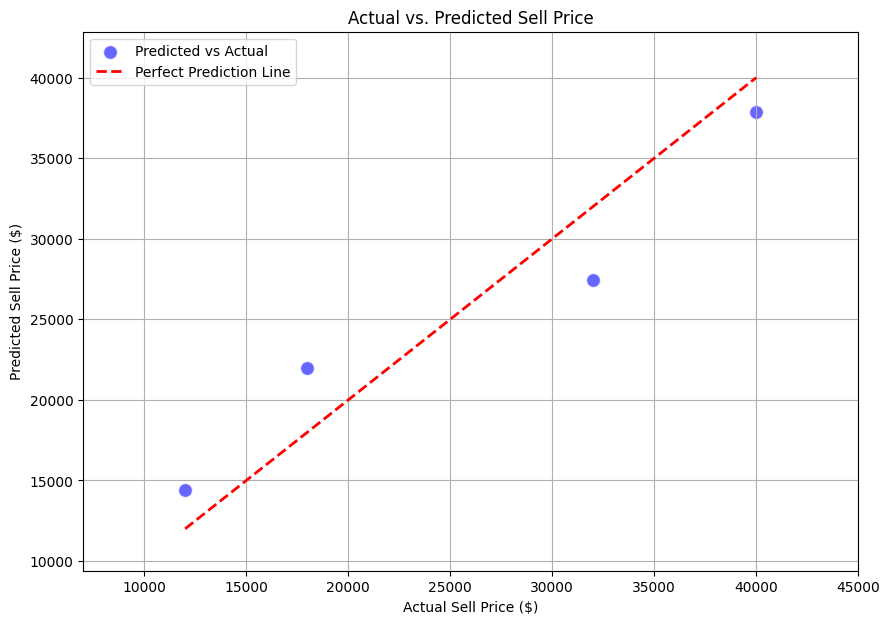

In [23]:
# Convert predictions and test values to numpy arrays if needed
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Plotting the results
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolors='w', s=100, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect Prediction Line')
plt.xlabel('Actual Sell Price ($)')
plt.ylabel('Predicted Sell Price ($)')
plt.title('Actual vs. Predicted Sell Price')
plt.xlim([min(y_test) - 5000, max(y_test) + 5000])
plt.ylim([min(y_pred) - 5000, max(y_pred) + 5000])
plt.grid(True)
plt.legend()
plt.show()